In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Part 1

### Importing cell cycle dataset cleaning it

In [2]:
df = pd.read_excel("Cell-Cycle-Set.xlsx")

In [3]:
# Dropping row with NaN values in one of the numeric columns for RNA or protein concentration
df.dropna(subset=['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2',]);

### 1. Calculating mean and variance

In [4]:
pd.DataFrame([df.mean(numeric_only=True), df.var(numeric_only=True)], index=['Mean', 'Variance'])

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
Mean,11.114732,11.086037,11.157963,25.148932,22.640491,25.391696
Variance,2.242886,2.247478,2.188892,10.330618,10.268856,9.828018


### 2. Generating histogram of G1 cycle RNA and Protein distribution

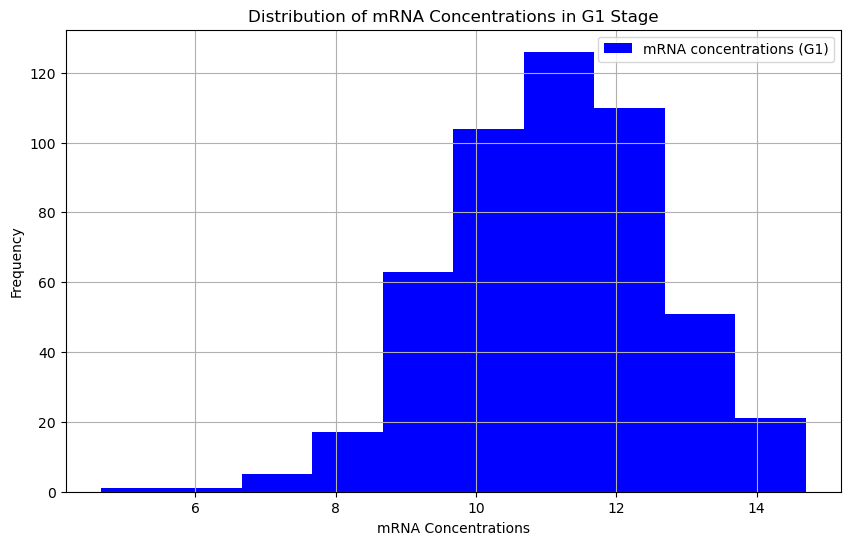

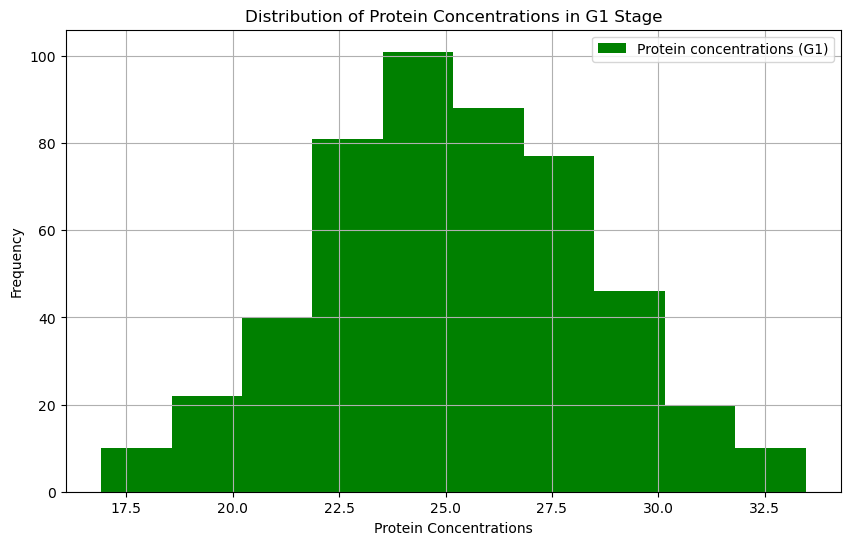

In [5]:
# Plot mRNA concentrations in G1 stage
plt.figure(figsize=(10, 6))
plt.hist(df['mean_RNA_G1'], color='blue', label='mRNA concentrations (G1)')
plt.xlabel('mRNA Concentrations')
plt.ylabel('Frequency')
plt.title('Distribution of mRNA Concentrations in G1 Stage')
plt.legend()
plt.grid(True)
plt.show()

# Plot protein concentrations in G1 stage
plt.figure(figsize=(10, 6))
plt.hist(df['mean_protein_G1'], color='green', label='Protein concentrations (G1)')
plt.xlabel('Protein Concentrations')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Concentrations in G1 Stage')
plt.legend()
plt.grid(True)
plt.show()

Both RNA and protein concentrations forming bell curves suggests that these distributions are approximately normal falling around the mean value. This indicates that there might be a potential correlation between the two values. However, this might be an oversimplification of the realtionship and further investigation is necessary.

### 3. Generating scatterplot of RNA vs Protein concentations

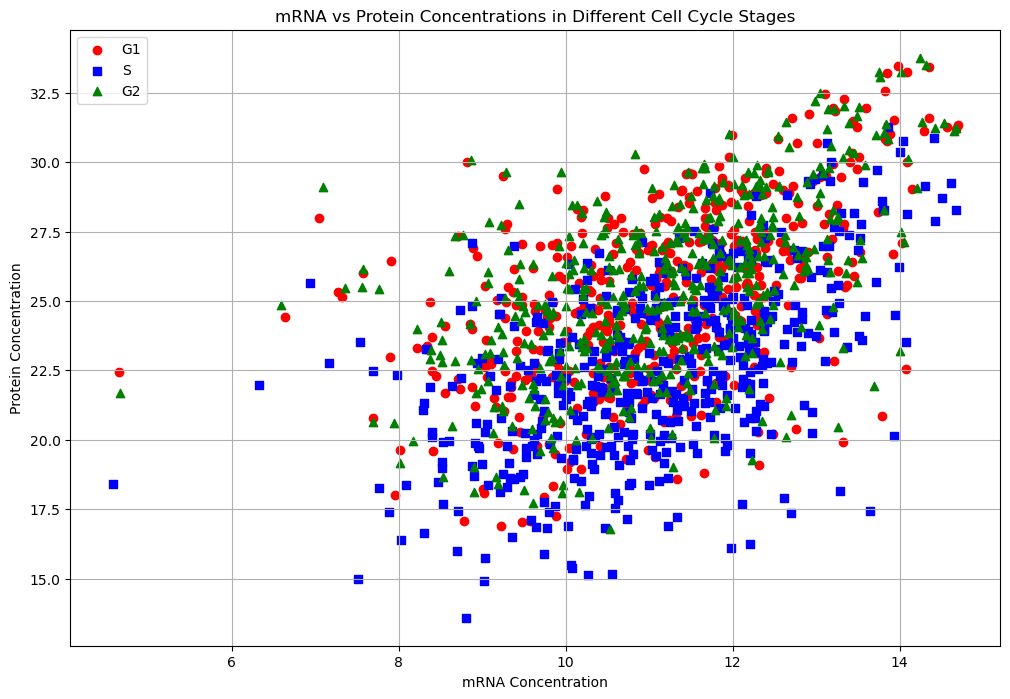

In [6]:
plt.figure(figsize=(12, 8))

# G1 stage
plt.scatter(df['mean_RNA_G1'], df['mean_protein_G1'], c='red', label='G1', marker='o')

# S stage
plt.scatter(df['mean_RNA_S'], df['mean_protein_S'], c='blue', label='S', marker='s')

# G2 stage
plt.scatter(df['mean_RNA_G2'], df['mean_protein_G2'], c='green', label='G2', marker='^')

# Adding labels and title
plt.xlabel('mRNA Concentration')
plt.ylabel('Protein Concentration')
plt.title('mRNA vs Protein Concentrations in Different Cell Cycle Stages')
plt.legend()
plt.grid(True)
plt.show()

### 4. Fitting linear model

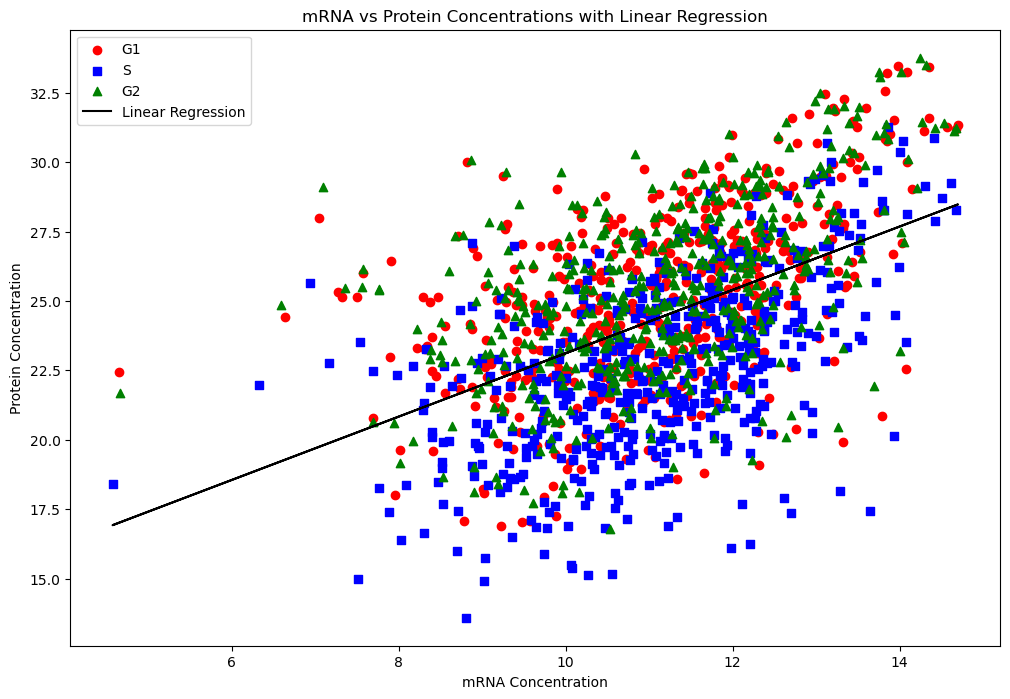

In [7]:
# Extract relevant columns
columns = ['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']
subset_df = df[columns].copy()

# Fill NaN values with the mean of each column
subset_df.fillna(subset_df.mean(), inplace=True)

# Prepare data
X = subset_df[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2']]
y = subset_df[['mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']]

# Concatenate all stages
X_all_stages = X.values.flatten().reshape(-1, 1)
y_all_stages = y.values.flatten()

# Fit the linear regression
model = LinearRegression()
model.fit(X_all_stages, y_all_stages)

# Plot the original scatterplot
plt.figure(figsize=(12, 8))
plt.scatter(subset_df['mean_RNA_G1'], subset_df['mean_protein_G1'], label='G1', color='red', marker='o')
plt.scatter(subset_df['mean_RNA_S'], subset_df['mean_protein_S'], label='S', color='blue', marker='s')
plt.scatter(subset_df['mean_RNA_G2'], subset_df['mean_protein_G2'], label='G2', color='green', marker='^')

# Plot the regression line
plt.plot(X_all_stages, model.predict(X_all_stages), label='Linear Regression', color='black')

# Set plot labels and title
plt.xlabel('mRNA Concentration')
plt.ylabel('Protein Concentration')
plt.title('mRNA vs Protein Concentrations with Linear Regression')
plt.legend()

# Show the plot
plt.show()

In [8]:
# Evaluate the model
y_pred = model.predict(X_all_stages)

# Calculate R-squared
r2 = r2_score(y_all_stages, y_pred)
print('R-squared:', r2)

# Calculate MSE
mse = mean_squared_error(y_all_stages, y_pred)
print('Mean Squared Error:', mse)

R-squared: 0.2505652690217375
Mean Squared Error: 8.669149206958712


The value for R-squared indicated that approximately 25% of the vairance in protein concentration can be predicted by the linear regression model using mRNA concentrations.
The value for the Mean Squared Error suggests that, on average, the model has a squared error of 8.67 units in it's predictions.

Both results indicate that there is some relationship between the two concentrations but the model does not manage to capture this very well.

# Part 2

### 1. Scatterplot of 'cell cycle' in GOBP overlaid across all genes for each cell cycle

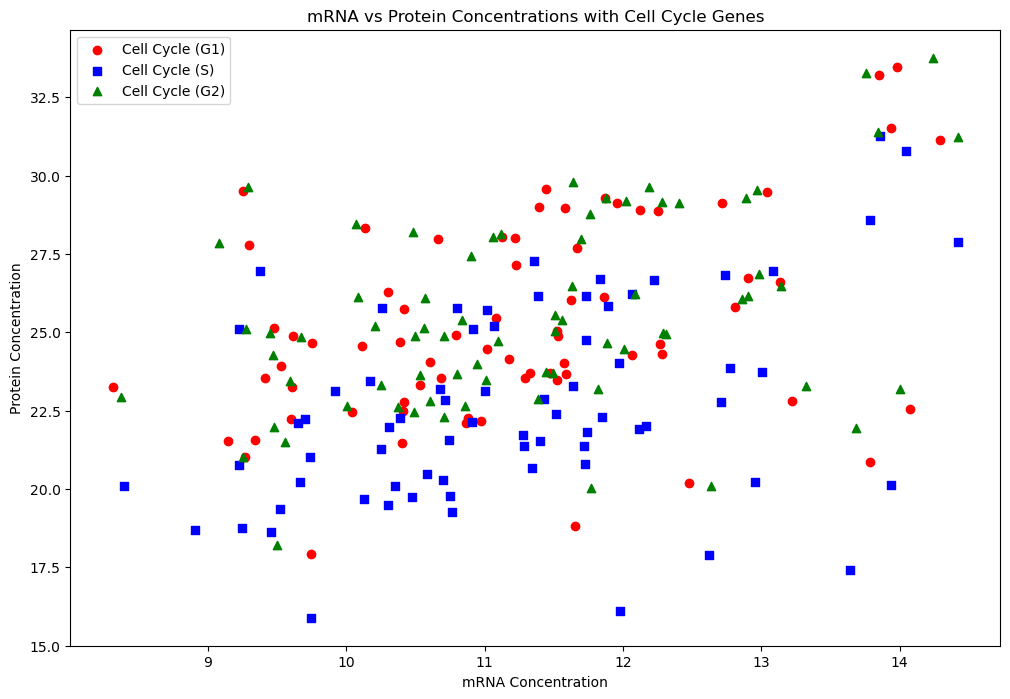

In [9]:
plt.figure(figsize=(12, 8))

# Extract genes with 'cell cycle' in their GOBP term
cellcycle_genes = df[df['GOBP'].str.contains('cell cycle', case=False, na=False)]

# Plot the scatterplot for genes with 'cellcycle' in their GOBP term
plt.scatter(cellcycle_genes['mean_RNA_G1'], cellcycle_genes['mean_protein_G1'], label='Cell Cycle (G1)', color='red', marker='o')
plt.scatter(cellcycle_genes['mean_RNA_S'], cellcycle_genes['mean_protein_S'], label='Cell Cycle (S)', color='blue', marker='s')
plt.scatter(cellcycle_genes['mean_RNA_G2'], cellcycle_genes['mean_protein_G2'], label='Cell Cycle (G2)', color='green', marker='^')

# Set plot labels and title
plt.xlabel('mRNA Concentration')
plt.ylabel('Protein Concentration')
plt.title('mRNA vs Protein Concentrations with Cell Cycle Genes')
plt.legend()

# Show the plot
plt.show()


Comments:
Correlation between RNA and Protein concentrations during G1 phase: 0.4206373496398073
Correlation between RNA and Protein concentrations during S phase: 0.4240426110452156
Correlation between RNA and Protein concentrations during G2 phase: 0.4358562781139501


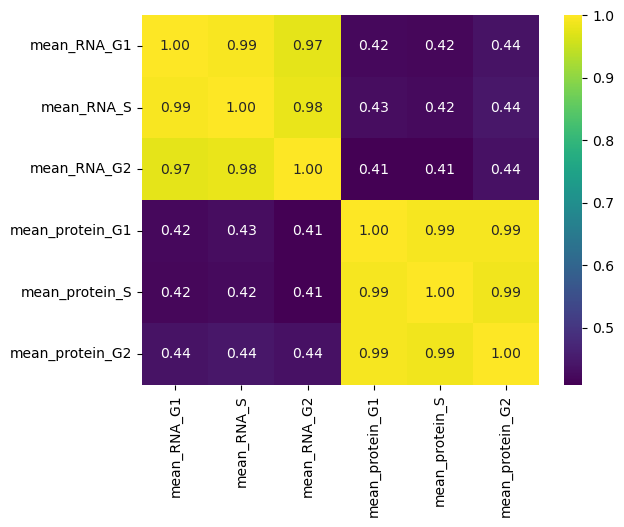

In [10]:
# Calculate correlations
correlations = cellcycle_genes[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].corr()

sns.heatmap(correlations, annot=True, cmap='viridis', fmt='.2f')

# Provide comments based on your understanding of the Cell Cycle
print("\nComments:")
print("Correlation between RNA and Protein concentrations during G1 phase:", correlations.loc['mean_RNA_G1', 'mean_protein_G1'])
print("Correlation between RNA and Protein concentrations during S phase:", correlations.loc['mean_RNA_S', 'mean_protein_S'])
print("Correlation between RNA and Protein concentrations during G2 phase:", correlations.loc['mean_RNA_G2', 'mean_protein_G2'])

High positive correlations exist between mRNA and Protein concentrations across different phases of the Cell Cycle. This suggests that the concentrations are strongly correlated within each phase, indicating a coordinated regulation of mRNA and Protein expression during the Cell Cycle.

For each phase (G1, S, G2), the correlation between mRNA and Protein concentrations is consistent.
The positive correlations between mRNA and Protein concentrations indicate that, on average, an increase in mRNA concentration is associated with an increase in protein concentration during the respective phase.

These results align with the general understanding of the Cell Cycle, where gene expression is tightly regulated to ensure proper progression through different phases.
The moderate correlation between mRNA and Protein concentrations suggests the involvement of additional regulatory mechanisms in shaping the final protein abundance.

### 2. Scatterplot of 'ribosome' in GOCC overlaid across all genes for each cell cycle

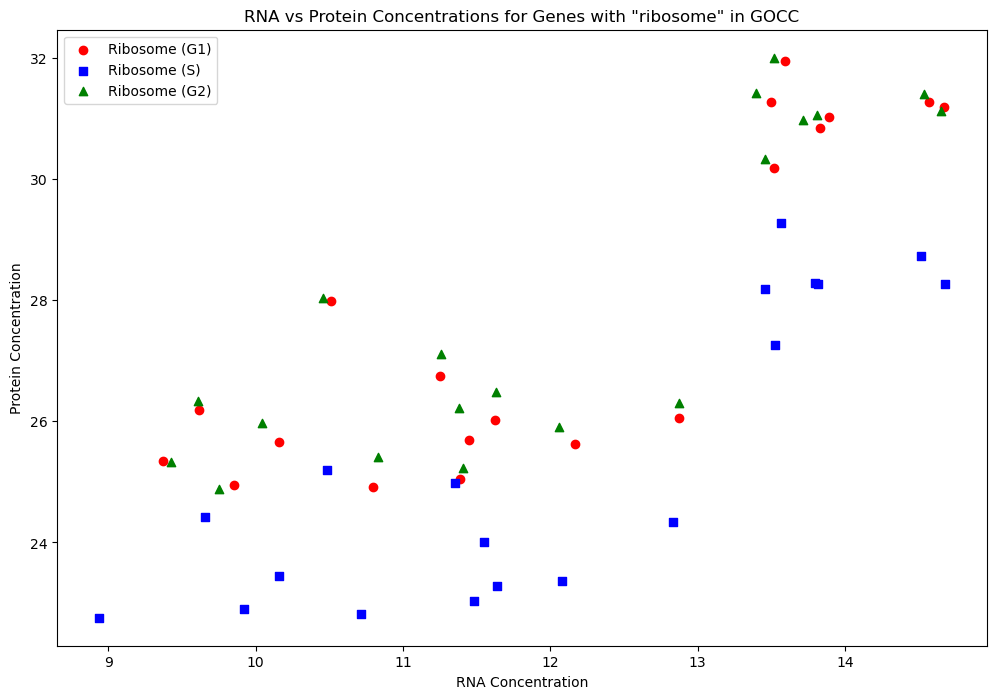

In [11]:
plt.figure(figsize=(12, 8))

# Filter genes with 'ribosome' in their GOCC term
ribosome_genes = df[df['GOCC'].str.contains('ribosome', case=False, na=False)]

# Plot the scatterplot for genes with 'ribosome' in their GOCC term
plt.scatter(ribosome_genes['mean_RNA_G1'], ribosome_genes['mean_protein_G1'], label='Ribosome (G1)', color='red', marker='o')
plt.scatter(ribosome_genes['mean_RNA_S'], ribosome_genes['mean_protein_S'], label='Ribosome (S)', color='blue', marker='s')
plt.scatter(ribosome_genes['mean_RNA_G2'], ribosome_genes['mean_protein_G2'], label='Ribosome (G2)', color='green', marker='^')

# Set plot labels and title
plt.xlabel('RNA Concentration')
plt.ylabel('Protein Concentration')
plt.title('RNA vs Protein Concentrations for Genes with "ribosome" in GOCC')
plt.legend()

# Show the plot
plt.show()


Comments:
Correlation between RNA and Protein concentrations during G1 phase: 0.8408005925694081
Correlation between RNA and Protein concentrations during S phase: 0.8448011378787456
Correlation between RNA and Protein concentrations during G2 phase: 0.8477056210062086


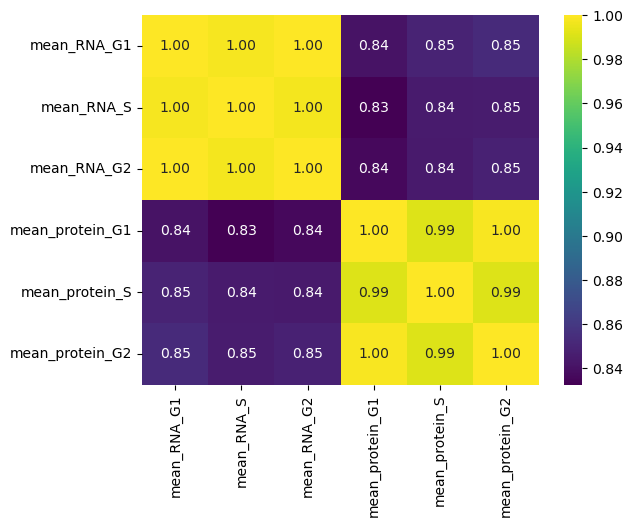

In [12]:
# Calculate correlations
correlations_ribosome = ribosome_genes[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].corr()

sns.heatmap(correlations_ribosome, annot=True, cmap='viridis', fmt='.2f')

# Provide comments based on your understanding of the Cell Cycle
print("\nComments:")
print("Correlation between RNA and Protein concentrations during G1 phase:", correlations_ribosome.loc['mean_RNA_G1', 'mean_protein_G1'])
print("Correlation between RNA and Protein concentrations during S phase:", correlations_ribosome.loc['mean_RNA_S', 'mean_protein_S'])
print("Correlation between RNA and Protein concentrations during G2 phase:", correlations_ribosome.loc['mean_RNA_G2', 'mean_protein_G2'])

The correlation coefficients are consistently high, for RNA and protein concentrations during each phase. This suggests a strong positive linear relationship between mRNA and protein concentrations for genes associated with ribosomes.

This is biologically supported by the fact that ribosomes are essential cellular structures responsible for protein synthesis. The close coordination between mRNA and protein concentrations during the cell cycle aligns with the expected role of ribosomes in mediating translation processes. This alignment supports the concept that ribosomes play a central role in protein synthesis and are tightly regulated to meet the demands of cellular activities during different cell cycle phases.

### 3. Counting occurences for each GOBP term across all genes

In [13]:
# Showing all the entries
pd.options.display.max_rows = 3000

# Extract the 'GOBP' column
gobp_terms = df['GOBP'].dropna().str.split(';')

# Flatten the list of lists and count occurrences
gobp_counts = pd.Series([item.strip() for sublist in gobp_terms for item in sublist]).value_counts()

# Print the counts
print("Number of occurrences of each GOBP term:")
print(gobp_counts)

Number of occurrences of each GOBP term:
cellular process                                                                                                                                       408
metabolic process                                                                                                                                      296
cellular metabolic process                                                                                                                             281
primary metabolic process                                                                                                                              276
biological regulation                                                                                                                                  248
regulation of biological process                                                                                                                       236
macromolecule metabolic proce

Some terms may be very specific, while others are more general. Redundancy in the terms might lead to challenges in data interpretation, and it requires careful consideration of whether to use broad or specific terms. Some terms may have multiple meanings or interpretations. Highly frequent terms may not provide meaningful insights, while rare terms may lack statistical power.

### 4. Calculating change in mRNA/Protein levels acrss the cell cycle

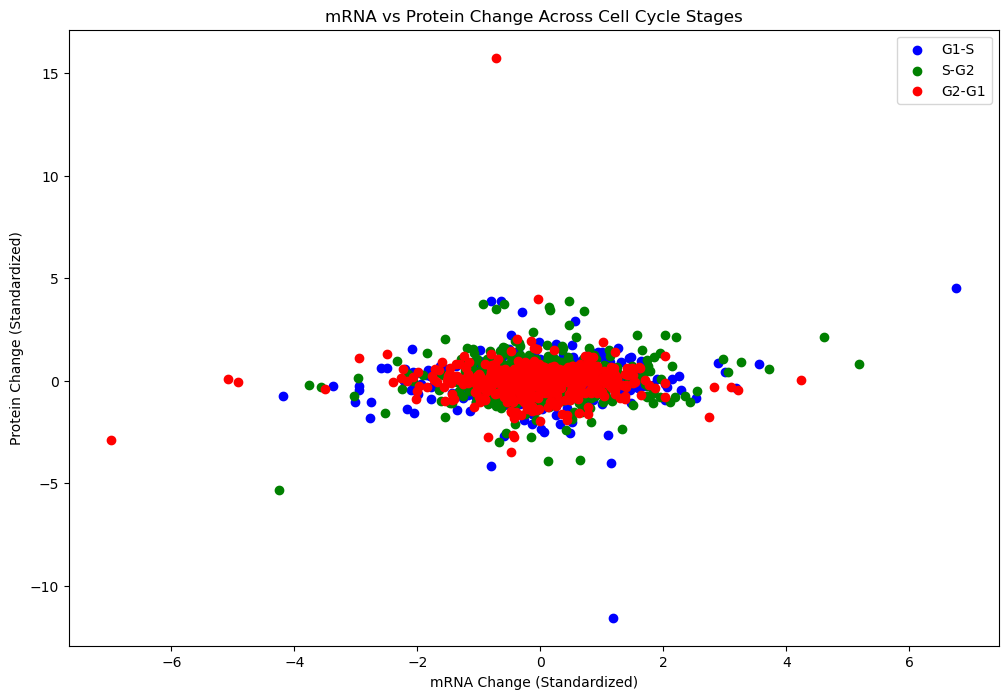

In [14]:
# Calculate the differences between stages
df['mRNA_G1S_diff'] = df['mean_RNA_S'] - df['mean_RNA_G1']
df['mRNA_SG2_diff'] = df['mean_RNA_G2'] - df['mean_RNA_S']
df['mRNA_G2G1_diff'] = df['mean_RNA_G1'] - df['mean_RNA_G2']

df['protein_G1S_diff'] = df['mean_protein_S'] - df['mean_protein_G1']
df['protein_SG2_diff'] = df['mean_protein_G2'] - df['mean_protein_S']
df['protein_G2G1_diff'] = df['mean_protein_G1'] - df['mean_protein_G2']

# Standardize the differences using mean-centering and variance scaling
scaler = StandardScaler()
mRNA_diffs = scaler.fit_transform(df[['mRNA_G1S_diff', 'mRNA_SG2_diff', 'mRNA_G2G1_diff']])
protein_diffs = scaler.fit_transform(df[['protein_G1S_diff', 'protein_SG2_diff', 'protein_G2G1_diff']])

# Plot the standardized differences on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(mRNA_diffs[:, 0], protein_diffs[:, 0], label='G1-S', color='blue', marker='o')
plt.scatter(mRNA_diffs[:, 1], protein_diffs[:, 1], label='S-G2', color='green', marker='o')
plt.scatter(mRNA_diffs[:, 2], protein_diffs[:, 2], label='G2-G1', color='red', marker='o')

# Set plot labels and title
plt.xlabel('mRNA Change (Standardized)')
plt.ylabel('Protein Change (Standardized)')
plt.title('mRNA vs Protein Change Across Cell Cycle Stages')
plt.legend()

# Show the plot
plt.show()

### 5. Comments 

We can observe that from G2 to G1 phase there is the most clustering towards the mean. This is inline with our expectations as the mRNA and protein chage patterns should normalize as the cell prepares for cell division. A higher spread in the G1 and S phases is normal as these are complex stages in the cell cycle.

### 6. Other exploration

### Exploring differences in concentrations clustering

In [15]:
# Drop rows with NaN values
df.dropna(subset=['mRNA_G1S_diff', 'mRNA_SG2_diff', 'mRNA_G2G1_diff', 'protein_G1S_diff', 'protein_SG2_diff', 'protein_G2G1_diff'], inplace=True)

mRNA_data = df[['mRNA_G1S_diff', 'mRNA_SG2_diff', 'mRNA_G2G1_diff']]
protein_data = df[['protein_G1S_diff', 'protein_SG2_diff', 'protein_G2G1_diff']]

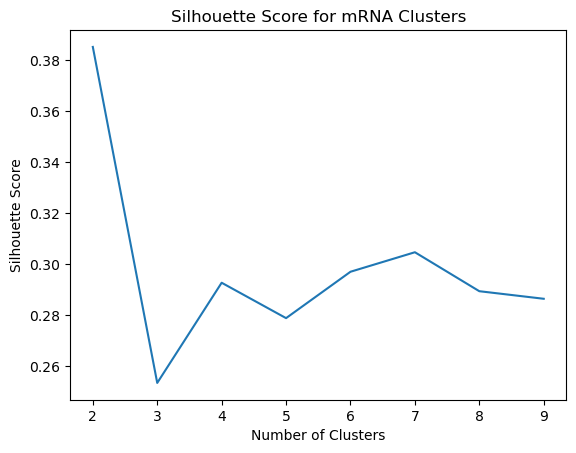

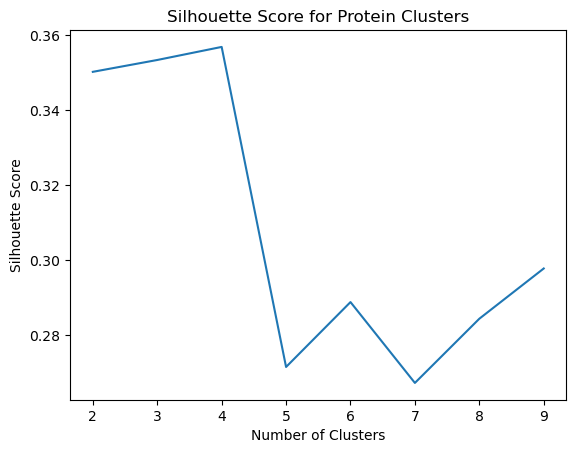

In [16]:
silhouette_scores = []

# Test different numbers of clusters
for n_clusters in range(2, 10):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = clustering.fit_predict(mRNA_data)
    silhouette_scores.append(silhouette_score(mRNA_data, labels))

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Score for mRNA Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

silhouette_scores = []

# Test different numbers of clusters
for n_clusters in range(2, 10):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean')
    labels = clustering.fit_predict(protein_data)
    silhouette_scores.append(silhouette_score(protein_data, labels))

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Score for Protein Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

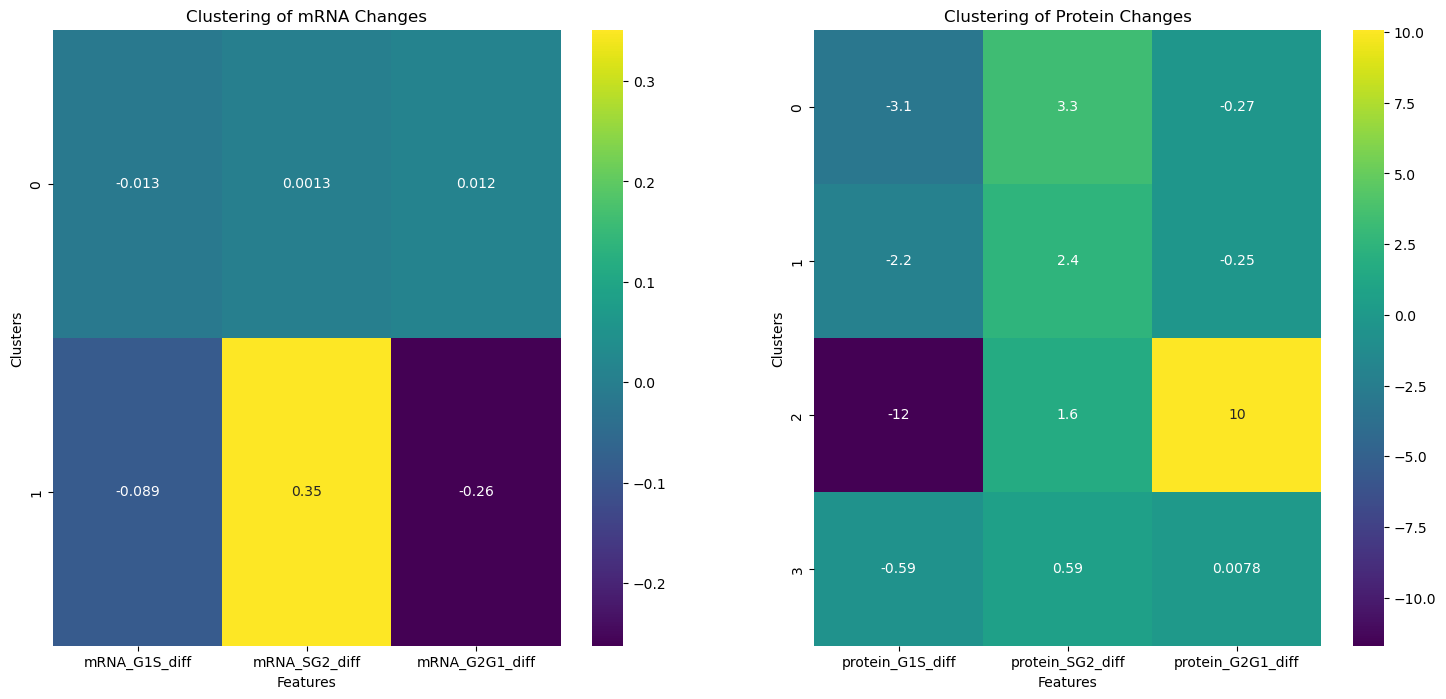

In [17]:
# Hierarchical clustering for mRNA data
mRNA_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['mRNA_cluster'] = mRNA_clustering.fit_predict(mRNA_data)

# Hierarchical clustering for protein data
protein_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['protein_cluster'] = protein_clustering.fit_predict(protein_data)

# Plot clusters for mRNA and protein
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# mRNA clustering heatmap
sns.heatmap(mRNA_data.join(df['mRNA_cluster']).groupby('mRNA_cluster').mean(), cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title('Clustering of mRNA Changes')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Clusters')

# Protein clustering heatmap
sns.heatmap(protein_data.join(df['protein_cluster']).groupby('protein_cluster').mean(), cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title('Clustering of Protein Changes')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Clusters')

plt.show()

### Fitting linear model only for ribosome mRNA vs Protein concentations

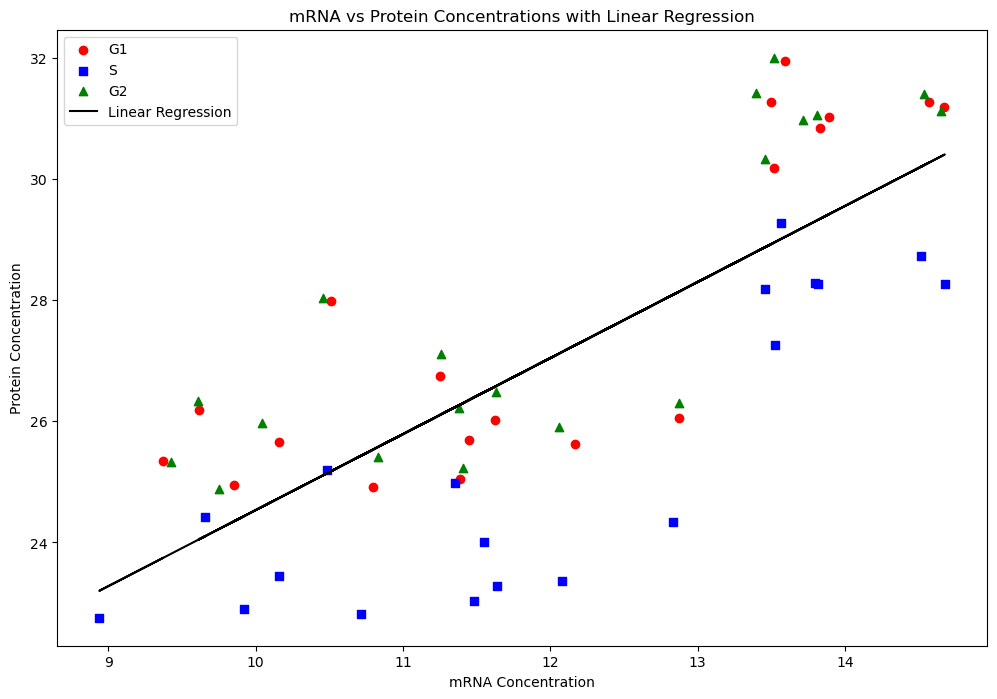

In [18]:
# Filter genes with 'ribosome' in their GOCC term
ribosome_genes = df[df['GOCC'].str.contains('ribosome', case=False, na=False)]

# Extract relevant columns
columns = ['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']
subset_df = ribosome_genes[columns].copy()


# Fill NaN values with the mean of each column
subset_df.fillna(subset_df.mean(), inplace=True)

# Prepare data
X = subset_df[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2']]
y = subset_df[['mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']]

# Concatenate all stages
X_all_stages = X.values.flatten().reshape(-1, 1)
y_all_stages = y.values.flatten()

# Fit the linear regression
model = LinearRegression()
model.fit(X_all_stages, y_all_stages)

# Plot the original scatterplot
plt.figure(figsize=(12, 8))
plt.scatter(subset_df['mean_RNA_G1'], subset_df['mean_protein_G1'], label='G1', color='red', marker='o')
plt.scatter(subset_df['mean_RNA_S'], subset_df['mean_protein_S'], label='S', color='blue', marker='s')
plt.scatter(subset_df['mean_RNA_G2'], subset_df['mean_protein_G2'], label='G2', color='green', marker='^')

# Plot the regression line
plt.plot(X_all_stages, model.predict(X_all_stages), label='Linear Regression', color='black')

# Set plot labels and title
plt.xlabel('mRNA Concentration')
plt.ylabel('Protein Concentration')
plt.title('mRNA vs Protein Concentrations with Linear Regression')
plt.legend()

# Show the plot
plt.show()

In [19]:
# Evaluate the model
y_pred = model.predict(X_all_stages)

# Calculate R-squared
r2 = r2_score(y_all_stages, y_pred)
print('R-squared:', r2)

# Calculate MSE
mse = mean_squared_error(y_all_stages, y_pred)
print('Mean Squared Error:', mse)

R-squared: 0.5850074920715963
Mean Squared Error: 3.186807248517792


As expected from the correlation metrics, we can more accurately predict the protein concentrations based on mRNA concentrations in ribosomes because of their functions. A simple linear model achieves almost 60% prediction accuracy.

It is important to note that there is a lack of data (only 17 data po) and a more accurate model could be achieved by adding another feature set.